In [333]:
# import the libraries:
from typing import List, Optional, Union, Dict, Tuple
import json
import argparse
from pathlib import Path
import cv2

import numpy as np
from scipy import signal as sg
from scipy.ndimage import maximum_filter
from PIL import Image
import matplotlib.pyplot as plt

In [1]:
# upload an image from the path: single_image/aachen_000011_000019_leftImg8bit.png
img = plt.imread("single_image/333.jpg")
if img.max() <= 1:
    img = (img * 255).astype(np.uint8)

NameError: name 'plt' is not defined

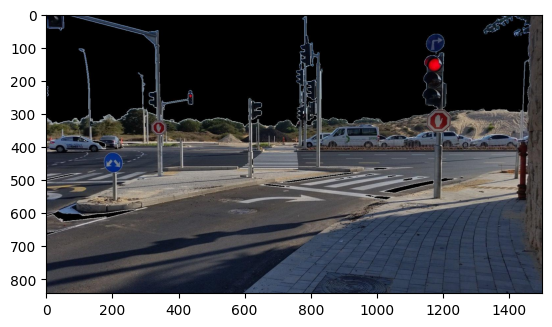

In [413]:
# show the img:
plt.imshow(img)

In [359]:
# print thre shape of the image:
print(img.shape)

(450, 800, 3)


In [414]:
# store the blue channel of the image
blue_img = img[:,:,2] # 0:R, 1:G, 2:B
# store the green channel of the image
green_img = img[:,:,1] # 0:R, 1:G, 2:B
# store the red channel of the image
red_img = img[:,:,0] # 0:R, 1:G, 2:B


In [415]:
# print the pixels of blue_img:
print(blue_img)

# write to txt file:
np.savetxt('tl_blue_img.txt', blue_img, fmt='%d')


[[187 164  77 ...  67  67  67]
 [190 172  89 ...  64  64  63]
 [187 166  91 ...  67  65  64]
 ...
 [ 70  70  72 ...  75  76  77]
 [ 70  70  72 ...  75  76  77]
 [ 68  68  70 ...  74  76  77]]


In [416]:
# print the pixels of blue_img:
print(green_img)

# write to txt file:
np.savetxt('tl_green_img.txt', green_img, fmt='%d')

[[148 126  42 ...  65  65  65]
 [150 134  54 ...  62  62  61]
 [147 127  55 ...  65  63  62]
 ...
 [ 68  68  70 ...  51  52  53]
 [ 68  68  70 ...  51  52  53]
 [ 68  68  70 ...  50  52  53]]


In [417]:
# print the pixels of the red_img:
print(red_img)

# write to txt file:
np.savetxt('tl_red_img.txt', red_img, fmt='%d')

[[116  96  16 ...  71  71  71]
 [121 104  28 ...  68  68  67]
 [119  99  31 ...  71  69  68]
 ...
 [ 68  68  70 ...  39  40  41]
 [ 68  68  70 ...  39  40  41]
 [ 68  68  70 ...  38  40  41]]


### show the shape of txt file:


In [418]:
# function that return the numbers of rows in a txt file:
def count_rows(file_name):
    with open(file_name) as file:
        return len(file.readlines())

In [419]:
# count the rows in the red_img.txt file:
print('number iof rows in red_img.txt:')
print(count_rows('tl_red_img.txt'))

# count the rows in the green_img.txt file:
print('number iof rows in green_img.txt:')
print(count_rows('tl_green_img.txt'))

# count the rows in the blue_img.txt file:
print('number iof rows in blue_img.txt:')
print(count_rows('tl_blue_img.txt'))

number iof rows in red_img.txt:
843
number iof rows in green_img.txt:
843
number iof rows in blue_img.txt:
843


In [420]:
def max_length(file):
    max_count = 0
    with open(file, 'r') as f:
        for line in f:
            count = len([int(item) for item in line.strip().split() if item.isdigit()])
            if count > max_count:
                max_count = count
    return max_count


In [421]:
# max length int the red_image.txt file:
max_length("tl_red_img.txt")

1500

In [422]:
# max length in green_img.txt: 
max_length("tl_green_img.txt")


1500

In [423]:
# max lenght in blue_img.txt:
max_length("tl_blue_img.txt")

1500

In [424]:
def has_same_number_of_numbers(file):
    previous_count = None
    with open(file, 'r') as f:
        for line in f:
            count = len([item for item in line.strip().split() if item.isdigit()])
            if previous_count is not None and count != previous_count:
                return False
            previous_count = count
    return True


In [425]:
# chack if the red image has the same number of numbers as the original image
print("red image:")
print(has_same_number_of_numbers("tl_red_img.txt"))

# chack if the green image has the same number of numbers as the original image:
print("green image:")
print(has_same_number_of_numbers("tl_green_img.txt"))

# chack if the blue image has the same number of numbers as the original image:
print("blue image:")
print(has_same_number_of_numbers("tl_blue_img.txt"))

red image:
True
green image:
True
blue image:
True


In [426]:
# function the gets two path of txt files and returns the content of the files are equal:
def compare_files(path1, path2):
    with open(path1, 'r') as file1, open(path2, 'r') as file2:
        return file1.read() == file2.read()


In [427]:
#================
# compare files:
#================ 

# compare red and blue:
print ("red and blue:")
print(compare_files('tl_red_img.txt',"tl_blue_img.txt"))

# compare red and green:
print ("red and green:")
print(compare_files('tl_red_img.txt',"tl_green_img.txt"))

# compare blue and green:
print ("blue and green:")
print(compare_files('tl_blue_img.txt',"tl_green_img.txt"))

red and blue:
False
red and green:
False
blue and green:
False


In [428]:
# function that gets txt file side 2048x1024 and show the image in red channel:

def show_red_channel(txt_file):
    # Read the data from the txt file
    data = np.loadtxt(txt_file, dtype=np.uint8)

    red_channel_image = data.reshape(data.shape[0], data.shape[1])

    # Create an RGB image with the red channel
    rgb_image = np.zeros((data.shape[0], data.shape[1], 3), dtype=np.uint8)
    rgb_image[:,:,0] = red_channel_image # 0-red channel, 1-green channel, 2-blue channel

    # Display the image
    plt.imshow(rgb_image)
    plt.axis('off') # to remove axis
    plt.show()    

In [429]:
# function that gets txt file side 2048x1024 and save in red channel:
def save_red_channel(txt_file, output_image_file):
    # Read the data from the txt file
    data = np.loadtxt(txt_file, dtype=np.uint8)

    red_channel_image = data.reshape(data.shape[0], data.shape[1]) 

    # Create an RGB image with the red channel
    rgb_image = np.zeros((data.shape[0], data.shape[1], 3), dtype=np.uint8)
    rgb_image[:,:,0] = red_channel_image # 0-red channel, 1-green channel, 2-blue channel

    # Save the image to the specified file
    plt.imsave(output_image_file, rgb_image)


In [430]:
save_red_channel("tl_red_img.txt", "outputs_image_one_chanel/tl_red.png")

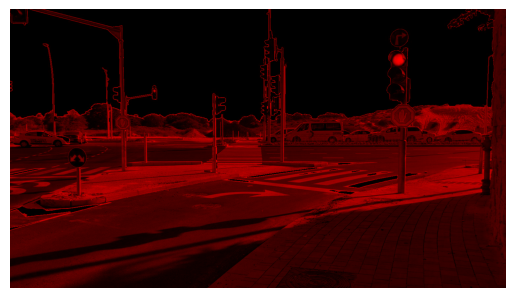

In [431]:
show_red_channel("tl_red_img.txt")

In [432]:
# function that gets txt file and show the image in red channel:

def show_green_channel(txt_file):
    # Read the data from the txt file
    data = np.loadtxt(txt_file, dtype=np.uint8)

    green_channel_image = data.reshape(data.shape[0], data.shape[1])

    # Create an RGB image with the red channel
    rgb_image = np.zeros((data.shape[0], data.shape[1], 3), dtype=np.uint8)
    rgb_image[:,:,1] = green_channel_image # 0-red channel, 1-green channel, 2-blue channel

    # Display the image
    plt.imshow(rgb_image)
    plt.axis('off') # to remove axis
    plt.show()    

In [433]:
# function that gets txt file  and save in green channel:
def save_green_channel(txt_file, output_image_file):
    # Read the data from the txt file
    data = np.loadtxt(txt_file, dtype=np.uint8)

    green_channel_image = data.reshape(data.shape[0], data.shape[1]) 

    # Create an RGB image with the red channel
    rgb_image = np.zeros((data.shape[0], data.shape[1], 3), dtype=np.uint8)
    rgb_image[:,:,1] = green_channel_image # 0-red channel, 1-green channel, 2-blue channel

    # Save the image to the specified file
    plt.imsave(output_image_file, rgb_image)


In [434]:
save_green_channel("tl_green_img.txt", "outputs_image_one_chanel/tl_green.png")

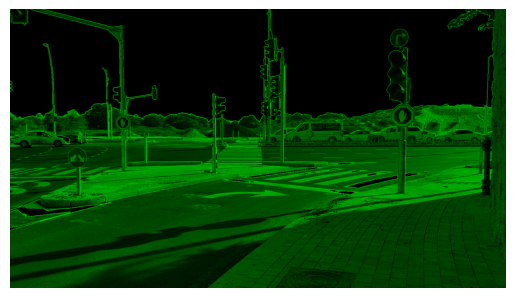

In [435]:
show_green_channel("tl_green_img.txt")

In [436]:
# function that gets txt file side 2048x1024 and show the image in red channel:

def show_blue_channel(txt_file):
    # Read the data from the txt file
    data = np.loadtxt(txt_file, dtype=np.uint8)

    blue_channel_image = data.reshape(data.shape[0], data.shape[1])

    # Create an RGB image with the red channel
    rgb_image = np.zeros((data.shape[0], data.shape[1], 3), dtype=np.uint8)
    rgb_image[:,:,2] = blue_channel_image # 0-red channel, 1-green channel, 2-blue channel

    # Display the image
    plt.imshow(rgb_image)
    plt.axis('off') # to remove axis
    plt.show()    

In [437]:
# function that gets txt file side 2048x1024 and save in red channel:
def save_blue_channel(txt_file, output_image_file):
    # Read the data from the txt file
    data = np.loadtxt(txt_file, dtype=np.uint8)

    blue_channel_image = data.reshape(data.shape[0], data.shape[1]) 

    # Create an RGB image with the red channel
    rgb_image = np.zeros((data.shape[0], data.shape[1], 3), dtype=np.uint8)
    rgb_image[:,:,2] = blue_channel_image # 0-red channel, 1-green channel, 2-blue channel

    # Save the image to the specified file
    plt.imsave(output_image_file, rgb_image)


In [438]:
save_blue_channel("tl_blue_img.txt", "outputs_image_one_chanel/tl_blue.png")

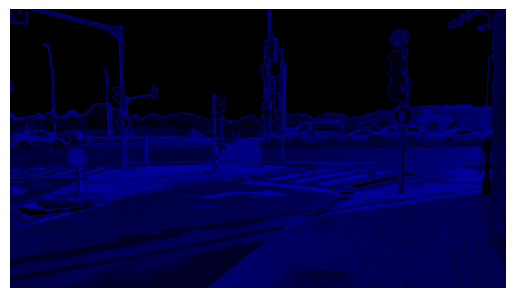

In [439]:
show_blue_channel("tl_blue_img.txt")

In [440]:
# Red chanel information:
new_red_img = plt.imread('./outputs_image_one_chanel/tl_red.png')
if img.max() <= 1:
    new_red_img = (img * 255).astype(np.uint8)

# print the shape of the image:
print(new_red_img.shape)

# print the red channel:
print(new_red_img[:,:,0])

# print the green channel:
print(new_red_img[:,:,1])

# print the blue channel:
print(new_red_img[:,:,2])

print(new_red_img[:,:,3])

(843, 1500, 4)
[[0.45490196 0.3764706  0.0627451  ... 0.2784314  0.2784314  0.2784314 ]
 [0.4745098  0.40784314 0.10980392 ... 0.26666668 0.26666668 0.2627451 ]
 [0.46666667 0.3882353  0.12156863 ... 0.2784314  0.27058825 0.26666668]
 ...
 [0.26666668 0.26666668 0.27450982 ... 0.15294118 0.15686275 0.16078432]
 [0.26666668 0.26666668 0.27450982 ... 0.15294118 0.15686275 0.16078432]
 [0.26666668 0.26666668 0.27450982 ... 0.14901961 0.15686275 0.16078432]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [441]:
# Green channel information:

# Read the green channel image (replace with the correct path)
new_green_img = plt.imread('./outputs_image_one_chanel/tl_green.png')
if img.max() <= 1:
    new_green_img = (img * 255).astype(np.uint8)
# Print the shape of the image
print(new_green_img.shape)

# Print the red channel (should be all zeros or the same value)
print(new_green_img[:,:,0])

# Print the green channel (should contain the data)
print(new_green_img[:,:,1])

# Print the blue channel (should be all zeros or the same value)
print(new_green_img[:,:,2])

# Print the alpha channel if present (may be all ones for full opacity)
print(new_green_img[:,:,3])


(843, 1500, 4)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.5803922  0.49411765 0.16470589 ... 0.25490198 0.25490198 0.25490198]
 [0.5882353  0.5254902  0.21176471 ... 0.24313726 0.24313726 0.23921569]
 [0.5764706  0.49803922 0.21568628 ... 0.25490198 0.24705882 0.24313726]
 ...
 [0.26666668 0.26666668 0.27450982 ... 0.2        0.20392157 0.20784314]
 [0.26666668 0.26666668 0.27450982 ... 0.2        0.20392157 0.20784314]
 [0.26666668 0.26666668 0.27450982 ... 0.19607843 0.20392157 0.20784314]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [442]:
# Blue channel information:
new_blue_img = plt.imread('./outputs_image_one_chanel/tl_blue.png')
if img.max() <= 1:
    new_red_img = (img * 255).astype(np.uint8)

# Print the shape of the image:
print(new_blue_img.shape)

# Print the red channel:
print(new_blue_img[:,:,0])

# Print the green channel:
print(new_blue_img[:,:,1])

# Print the blue channel:
print(new_blue_img[:,:,2])

# Print the alpha channel (if it exists):
if new_blue_img.shape[2] == 4:
    print(new_blue_img[:,:,3])


(843, 1500, 4)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.73333335 0.6431373  0.3019608  ... 0.2627451  0.2627451  0.2627451 ]
 [0.74509805 0.6745098  0.34901962 ... 0.2509804  0.2509804  0.24705882]
 [0.73333335 0.6509804  0.35686275 ... 0.2627451  0.25490198 0.2509804 ]
 ...
 [0.27450982 0.27450982 0.28235295 ... 0.29411766 0.29803923 0.3019608 ]
 [0.27450982 0.27450982 0.28235295 ... 0.29411766 0.29803923 0.3019608 ]
 [0.26666668 0.26666668 0.27450982 ... 0.2901961  0.29803923 0.3019608 ]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


### show the data in grey scale

In [443]:
# function to show image from txt file - gray scale
def show_image(txt_file):
    # Read the data from the txt file
    data = np.loadtxt(txt_file, dtype=np.uint8)

    # Reshape the data into an image format (1024, 2048)
    # This assumes that a single channel (e.g., red) is stored in the file
    channel_image = data.reshape(data.shape[0], data.shape[1])

    # Create a greyscale image using the channel
    grey_image = np.stack([channel_image]*3, axis=-1)

    # Display the image
    plt.imshow(grey_image, cmap='gray')
    plt.axis('off') # to remove axis
    plt.show()


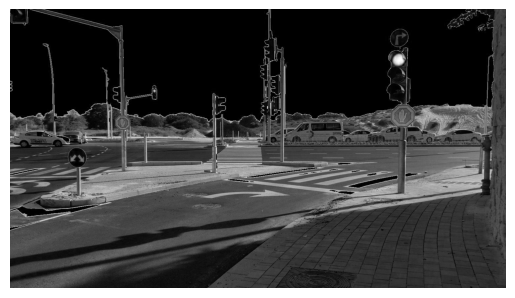

In [444]:
# Show the red channel of the image (grey scale):
show_image("tl_red_img.txt")

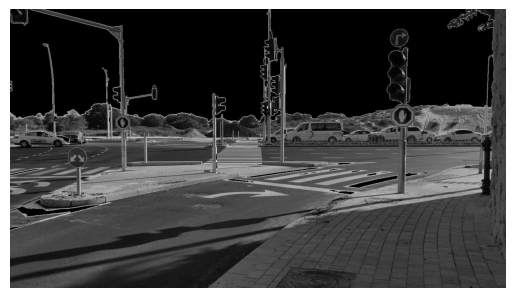

In [445]:
# Show the green channel of the image (grey scale):
show_image("tl_green_img.txt")

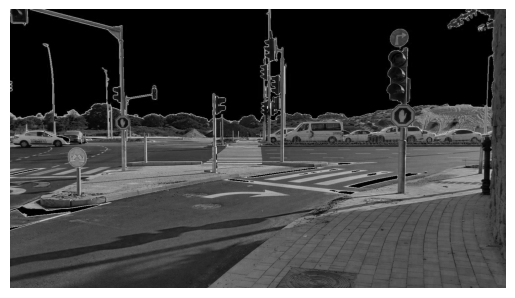

In [446]:
# Show the blue channel of the image (grey scale):
show_image("tl_blue_img.txt")

In [447]:
# function to save image from txt file - gray scale:
def save_image(txt_file, output_path):
    # Read the data from the txt file
    data = np.loadtxt(txt_file, dtype=np.uint8)

    # Reshape the data into an image format (1024, 2048)
    # This assumes that a single channel (e.g., red) is stored in the file
    channel_image = data.reshape(data.shape[0], data.shape[1])

    # Create a greyscale image using the channel
    grey_image = np.stack([channel_image]*3, axis=-1)

    # Save the image to the specified output path
    plt.imsave(output_path, grey_image, cmap='gray')

In [448]:
txt_file_path = "tl_red_img.txt"
output_image_path = "./outputs_image_one_chanel/tl_grey_scale_red_img.png"

save_image(txt_file_path, output_image_path) # save the red  in grey scale

In [449]:
txt_file_path = "tl_green_img.txt"
output_image_path = "./outputs_image_one_chanel/tl_grey_scale_green_img.png"

save_image(txt_file_path, output_image_path) # save the red  in grey scale

In [450]:
txt_file_path = "tl_blue_img.txt"
output_image_path = "./outputs_image_one_chanel/tl_grey_scale_blue_img.png"

save_image(txt_file_path, output_image_path) # save the red  in grey scale

In [451]:
# function the read pixels form txt file to np array size nxm
def read_pixels(file_name):
    pixels = []
    with open(file_name, 'r') as f:
        for line in f:
            pixels.append(line.split())
    return np.array(pixels, dtype=np.uint8)

In [463]:
from PIL import Image, ImageDraw
import numpy as np
from scipy.ndimage import convolve

def mark_regions(numpy_pixels):
    # Convert the input 2D numpy array to a PIL image (grayscale)
    grayscale_image = Image.fromarray(numpy_pixels.astype('uint8'))

    # Create a new RGB image to draw the "X" marks on
    marked_image = grayscale_image.convert("RGB")
    
    # Initialize the drawing context
    draw = ImageDraw.Draw(marked_image)

    # Define the convolution kernel
    kernel = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

    # Apply the convolution operation to get a score for each pixel
    score = convolve(numpy_pixels, kernel)

    # Loop through each pixel and mark the regions with an "X" mark
    height, width = numpy_pixels.shape
    for y in range(height):
        for x in range(width):
            # Check if the score is above a threshold to consider it a region to mark
            if score[y, x] > 210:
                # Draw a green "X" mark at the current pixel
                draw.line([(x - 5, y - 5), (x + 5, y + 5)], fill="green", width=2)
                draw.line([(x - 5, y + 5), (x + 5, y - 5)], fill="green", width=2)

    # Save the image
    marked_image.save("outputs_image_one_chanel/x_tl_grey_scale_red_img.png")
    return marked_image




In [464]:
red_pixels = read_pixels("tl_red_img.txt")
print(red_pixels)

[[116  96  16 ...  71  71  71]
 [121 104  28 ...  68  68  67]
 [119  99  31 ...  71  69  68]
 ...
 [ 68  68  70 ...  39  40  41]
 [ 68  68  70 ...  39  40  41]
 [ 68  68  70 ...  38  40  41]]


In [465]:
red_pixels.shape

(843, 1500)

In [466]:
green_pixels = read_pixels("tl_green_img.txt")
print(green_pixels)

[[148 126  42 ...  65  65  65]
 [150 134  54 ...  62  62  61]
 [147 127  55 ...  65  63  62]
 ...
 [ 68  68  70 ...  51  52  53]
 [ 68  68  70 ...  51  52  53]
 [ 68  68  70 ...  50  52  53]]


In [467]:
blue_pixels = read_pixels("tl_blue_img.txt")
print(blue_pixels)

[[187 164  77 ...  67  67  67]
 [190 172  89 ...  64  64  63]
 [187 166  91 ...  67  65  64]
 ...
 [ 70  70  72 ...  75  76  77]
 [ 70  70  72 ...  75  76  77]
 [ 68  68  70 ...  74  76  77]]


In [462]:
# Mark red regions with a black "X" mark using convolution
marked_image = mark_regions(red_pixels)

# Save the marked image
marked_image.show()

In [409]:
# Mark red regions with a black "X" mark using convolution
marked_image = mark_regions(green_pixels)

# Save the marked image
marked_image.show()

In [304]:
# Mark red regions with a black "X" mark using convolution
marked_image = mark_regions(blue_pixels)

# Save the marked image
marked_image.show()

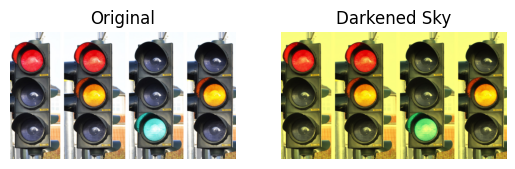

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def darken_sky(image_path, output_path):
    # Read the image
    image = Image.open(image_path)
    image_np = np.array(image)

    # Extract the blue channel
    blue_channel = image_np[:,:,2]

    # Define a factor by which to reduce the intensity of the blue channel
    reduction_factor = 0.5

    # Reduce the intensity of the blue channel
    blue_channel = (blue_channel * reduction_factor).astype(np.uint8)

    # Replace the blue channel in the original image
    image_np[:,:,2] = blue_channel

    # Create and save the output image
    output_image = Image.fromarray(image_np)
    output_image.save(output_path)

    # Display the original and enhanced image
    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.title('Original')

    plt.subplot(1, 2, 2)
    plt.imshow(image_np)
    plt.axis('off')
    plt.title('Darkened Sky')

    plt.show()

# Call the function with your image path and output path
darken_sky("single_image/tl.jpg", "single_image/tl_darkened_sky.jpg")


In [240]:
# function that get txt file and return is there is a value that bigger than n (parameter):
# asume that the txt file has many lines and each line has many numbers
def is_bigger_than_n(file_name, n):
    with open(file_name, 'r') as f:
        for line in f:
            for number in line.split():
                if int(number) > n:
                    return True
    return False

In [241]:
is_bigger_than_n("tl_blue_img.txt", 240)

True

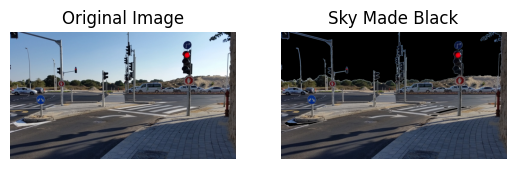

Image saved to 333.jpg


In [411]:
from scipy.ndimage import convolve
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def make_sky_black(image):
    # Convert the image to float
    img = np.array(image, dtype=float) / 255
    
    # Extract the blue channel
    blue_channel = img[:,:,2]
    
    # Create a kernel to detect the sky. 
    # This kernel is a simple averaging filter to smooth the image
    kernel = np.ones((5,5)) / 25
    
    # Convolve the blue channel with the kernel
    blue_smoothed = convolve(blue_channel, kernel)
    
    # Create a mask where the blue channel is above a certain threshold
    mask = blue_smoothed > 0.7
    
    # Apply the mask to all channels, setting them to 0 (black)
    img[mask] = 0
    
    # Convert back to 8-bit integer
    img_black_sky = (img * 255).astype(np.uint8)
    
    return Image.fromarray(img_black_sky)

# Load an example image
image_path = 'single_image/redLights.jpg'
image = Image.open(image_path)

# Call the function
black_sky_image = make_sky_black(image)

# Display the original and processed images
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(black_sky_image)
plt.title('Sky Made Black')
plt.axis('off')

plt.show()
# Define the path where you want to save the image
save_path = '333.jpg'

# Save the image
black_sky_image.save(save_path)

print(f"Image saved to {save_path}")


In [356]:
from scipy.ndimage import convolve
import numpy as np
from PIL import Image

def make_sky_black(image):
    # Convert the image to float
    img = np.array(image, dtype=float) / 255

    # Extract the red channel
    red_channel = img[:,:,0]

    # Create a kernel to smooth the red channel
    kernel = np.ones((5,5)) / 25

    # Convolve the red channel with the kernel
    red_smoothed = convolve(red_channel, kernel)

    # Create a mask where the red channel is above a certain threshold
    mask = red_smoothed > 0.5

    # Apply the mask to all channels, setting them to 0 (black)
    img[mask] = 0

    # Convert back to 8-bit integer
    img_black_sky = (img * 255).astype(np.uint8)

    return Image.fromarray(img_black_sky)

# Example usage:
image_path = 'single_image/greenlights2.jpg'
image = Image.open(image_path)
black_sky_image = make_sky_black(image)
black_sky_image.save('111.jpg')
